# Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from events_to_pd import events_to_pd
from gen_feats import gen_feats

# Load data

In [3]:
%%time
bkg_path = "bb1/run_a0.txt"
sig_path = "dark1/run_a0.txt"
bkg_path_test = "bb2/run_a0.txt"
sig_path_test = "dark2/run_a0.txt"

max_ev = int(1e5)

bkg, bkg_j = events_to_pd(bkg_path,max_ev)
sig, sig_j = events_to_pd(sig_path,max_ev)
bkg_test, bkg_j_test = events_to_pd(bkg_path_test,max_ev)
sig_test, sig_j_test = events_to_pd(sig_path_test,max_ev)

print("num Background train jets = {}".format(len(bkg_j)))
print("num Signal train jets = {}".format(len(sig_j)))
print("num Background test jets = {}".format(len(bkg_j_test)))
print("num Signal test jets = {}".format(len(sig_j_test)))

num Background train jets = 30215
num Signal train jets = 23727
num Background test jets = 29767
num Signal test jets = 23671
Wall time: 57.9 s


# Create features

In [14]:
x = 2
print(np.sin(2*np.arctan(np.exp(-x))))
print(1/np.cosh(x))

0.26580222883407967
0.2658022288340797


In [4]:
%%time
n_constits = 40

bkg, bkg_j = gen_feats(bkg, bkg_j, n_constits=n_constits, label=0, boost_and_shift=True)
sig, sig_j = gen_feats(sig, sig_j, n_constits=n_constits, label=1, boost_and_shif=True)

bkg_test, bkg_j_test = gen_feats(bkg_test, bkg_j_test, n_constits=n_constits, label=0, boost_and_shift=True)
sig_test, sig_j_test = gen_feats(sig_test, sig_j_test, n_constits=n_constits, label=1, boost_and_shift=True)

AttributeError: 'Series' object has no attribute 'track'

In [22]:
bkg_j.head()

,Event,Jet,PT,Eta,Phi,MET,mult_track,mult_tower_had,mult_tower_em,PT_track,...,Eem_tower_had,PT_tower_em,Eta_tower_em,Phi_tower_em,DeltaR_tower_em,Ehad_tower_em,Eem_tower_em,maxD0,maxDZ,label
0,1,1,155.922,-1.648660,0.509302,14.20870,6,7,4,"[32.1163, 27.1071, 16.8327, 13.0611, 5.72031, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0...","[23.2974, 10.1346, 4.98157, 0.337789, 0, 0, 0,...","[-1.65801, -1.64435, -1.54909, -1.67609, 0, 0,...","[0.545386, 0.542191, 0.54006, 0.601727, 0, 0, ...","[0.0372752, 0.0331691, 0.104215, 0.0964081, 0,...","[0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[63.3614, 27.2154, 12.2537, 0.934275, 0, 0, 0,...",0.055163,0.255871,0
1,1,2,142.915,-1.025060,-2.637990,14.20870,18,7,29,"[19.7127, 13.0751, 10.0122, 8.16364, 7.02233, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0...","[8.53273, 6.45491, 6.44524, 4.96046, 3.36237, ...","[-1.08996, -0.740367, -0.990506, -1.19355, -1....","[-2.68864, -2.24376, -2.65129, -2.77364, -2.68...","[0.0823259, 0.48628, 0.0370249, 0.216312, 0.08...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[14.1233, 8.30632, 9.87407, 8.9336, 5.622, 3.8...",0.022851,0.027905,0
2,2,1,194.794,0.889626,0.252623,8.75444,21,8,18,"[17.2272, 15.1303, 11.348, 8.19395, 8.04254, 6...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0,...","[6.02928, 5.78243, 5.18471, 3.646, 2.92807, 2....","[0.794385, 0.756056, 1.272, 1.02318, 0.759807,...","[0.128213, 0.266549, 0.283226, 0.172907, 0.106...","[0.15668, 0.134294, 0.383599, 0.155536, 0.1956...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.03383, 7.51534, 9.97605, 5.72692, 3.81472, ...",-0.042516,0.085162,0
3,2,2,193.322,0.847811,-2.887250,8.75444,11,5,10,"[46.4107, 12.5256, 10.3609, 10.3243, 7.2551, 5...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0,...","[26.4127, 14.4333, 14.2895, 12.0965, 7.56684, ...","[0.877742, 0.892519, 0.871793, 0.889545, 0.872...","[-2.88895, -2.91815, -2.90861, -2.88828, -2.93...","[0.0299796, 0.0543436, 0.0321165, 0.0417467, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[37.2576, 20.5739, 20.0724, 17.2064, 10.6377, ...",-0.812689,0.060323,0
4,3,1,147.250,-1.023480,-2.468190,12.16310,5,3,5,"[66.4079, 27.6133, 10.813, 7.02815, 1.78377, 0...",...,"[0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[24.9155, 15.4713, 2.54291, 0.378779, 0.27673,...","[-1.02453, -1.0146, -0.911189, -1.05025, -1.35...","[-2.47424, -2.46053, -2.365, -2.41837, -2.3094...","[0.00614394, 0.0117274, 0.152507, 0.056553, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0,...","[39.1765, 24.1415, 3.67365, 0.607603, 0.572639...",0.028172,0.053618,0


# Boost shift and rescale features

In [30]:
%%time
track_features = ["PT_track", "Eta_track", "Phi_track","D0_track", "DZ_track"]
tower_features = ["PT_tower_had", "Eta_tower_had", "Phi_tower_had","Ehad_tower_had", "Eem_tower_had"] + ["PT_tower_em", "Eta_tower_em", "Phi_tower_em","Ehad_tower_em", "Eem_tower_em"]
shift_feats = ["PT_track", "Eta_track", "Phi_track","D0_track", "DZ_track"] + ["PT_tower_had", "Eta_tower_had", "Phi_tower_had","Ehad_tower_had", "Eem_tower_had"] + ["PT_tower_em", "Eta_tower_em", "Phi_tower_em"," Ehad_tower_em", "Eem_tower_em"]
bkg_j[track_features+tower_features] = bkg_j[track_features+tower_features].applymap(np.array)
def boost(df):
    df.Phi_track = df.Phi_track-df.Phi
    df.Eta_track = df.Eta_track-df.Eta
    df.Phi_tower_em = df.Phi_tower_em-df.Phi
    df.Eta_tower_em = df.Eta_tower_em-df.Eta
    df.Phi_tower_had = df.Phi_tower_had-df.Phi
    df.Eta_tower_had = df.Eta_tower_had-df.Eta
def scale_PT(df):
    df.PT_track = df.PT_track/df.PT
    df.PT_tower_em = df.PT_tower_em/df.PT
    df.PT_tower_had = df.PT_tower_had/df.PT
boost(bkg_j)    
scale_PT(bkg_j)
bkg_j.head()

Wall time: 733 ms


,Event,Jet,PT,Eta,Phi,MET,mult_track,mult_tower_had,mult_tower_em,PT_track,...,Eem_tower_had,PT_tower_em,Eta_tower_em,Phi_tower_em,DeltaR_tower_em,Ehad_tower_em,Eem_tower_em,maxD0,maxDZ,label
0,1,1,155.922,-1.648660,0.509302,14.20870,6,7,4,"[0.2059767063018689, 0.17385038673182746, 0.10...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1494170162004079, 0.0649978835571632, 0.031...","[-0.00934999999999997, 0.004310000000000036, 0...","[0.036084000000000005, 0.032888999999999946, 0...","[0.0372752, 0.0331691, 0.104215, 0.0964081, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[63.3614, 27.2154, 12.2537, 0.934275, 0.0, 0.0...",0.055163,0.255871,0
1,1,2,142.915,-1.025060,-2.637990,14.20870,18,7,29,"[0.13793303711996643, 0.09148864709792535, 0.0...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.05970492950355107, 0.0451660777385159, 0.04...","[-0.06489999999999996, 0.2846930000000001, 0.0...","[-0.050650000000000084, 0.39422999999999986, -...","[0.0823259, 0.48628, 0.0370249, 0.216312, 0.08...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[14.1233, 8.30632, 9.87407, 8.9336, 5.622, 3.8...",0.022851,0.027905,0
2,2,1,194.794,0.889626,0.252623,8.75444,21,8,18,"[0.08843804223949403, 0.07767333696109736, 0.0...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.030952082713019906, 0.02968484655584874, 0....","[-0.09524100000000002, -0.13357000000000008, 0...","[-0.12440999999999999, 0.013925999999999994, 0...","[0.15668, 0.134294, 0.383599, 0.155536, 0.1956...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.03383, 7.51534, 9.97605, 5.72692, 3.81472, ...",-0.042516,0.085162,0
3,2,2,193.322,0.847811,-2.887250,8.75444,11,5,10,"[0.24006941786242642, 0.06479138432252926, 0.0...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1366254228696165, 0.07465937658414458, 0.07...","[0.02993100000000004, 0.04470799999999997, 0.0...","[-0.0017000000000000348, -0.030899999999999928...","[0.0299796, 0.0543436, 0.0321165, 0.0417467, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[37.2576, 20.5739, 20.0724, 17.2064, 10.6377, ...",-0.812689,0.060323,0
4,3,1,147.250,-1.023480,-2.468190,12.16310,5,3,5,"[0.4509874363327674, 0.18752665534804752, 0.07...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.16920543293718168, 0.10506825127334465, 0.0...","[-0.0010499999999999954, 0.008879999999999999,...","[-0.006050000000000111, 0.00766, 0.10318999999...","[0.00614394, 0.0117274, 0.152507, 0.056553, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[39.1765, 24.1415, 3.67365, 0.607603, 0.572639...",0.028172,0.053618,0


# Dense classifier

## Train/Validation split

In [24]:
%%time
feats = ["PT_track", "Eta_track", "Phi_track","D0_track", "DZ_track"]

val_frac = 0.5

data = pd.concat([sig_j,bkg_j]).sample(frac=1).reset_index()

train_ind = np.arange(0,int(len(data)*val_frac)) 
val_ind = np.arange(int(len(data)*val_frac),len(data))


X_train = np.concatenate(np.array(data.copy().iloc[train_ind][feats].applymap(np.array)).flatten()).reshape(len(train_ind), n_constits*len(feats))
y_train = data.iloc[train_ind]["label"]

X_val =np.concatenate(np.array(data.copy().iloc[val_ind][feats].applymap(np.array)).flatten()).reshape(len(val_ind), n_constits*len(feats))
y_val = data.loc[val_ind]["label"]

X_test_B = np.concatenate(np.array(bkg_j_test.copy()[feats].applymap(np.array)).flatten()).reshape(len(bkg_j_test), n_constits*len(feats))
X_test_S = np.concatenate(np.array(sig_j_test.copy()[feats].applymap(np.array)).flatten()).reshape(len(sig_j_test), n_constits*len(feats))

print("num total examples = {}".format(len(data)))
print("num train examples = {}".format(len(train_ind)))
print("num validate examples = {}".format(len(val_ind)))

num total examples = 38164
num train examples = 19082
num validate examples = 19082
Wall time: 3.68 s


## Model

In [25]:
#Define model
dimWX=(n_constits, len(feats))
model = Sequential()
model.add(Dense(1024, activation='elu', input_shape=(dimWX[0]*dimWX[1],)))
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

#Compile
sgd = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=sgd,loss='binary_crossentropy')
model.summary()

# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('dense_WandB', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, verbose=1, mode="auto", baseline=None, restore_best_weights=False)

#Train model
train_history = model.fit(X_train, y_train, batch_size=1000, epochs=50, validation_data=(X_val,y_val), callbacks=[checkpoint, es])

#Load best weights
model = tf.keras.models.load_model("dense_WandB")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              205824    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 862,209
Trainable params: 862,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19/20 [===========================>..] - ETA: 0s - loss: 1.0390
Epoch 00001: val_loss improved from inf to 0.44725, saving model to dense_WandB
INFO:tensorflow:Assets written to: dense_WandB\assets
20/20 [==============================

## Evaluate

In [28]:
%%time
thresh = 0.91

bkg_preds = model.predict(X_test_B).flatten()
sig_preds = model.predict(X_test_S).flatten()
bkg_eff = sum(bkg_preds>thresh)/len(bkg_preds)
sig_eff = sum(sig_preds>thresh)/len(sig_preds)

print("sig_eff={}".format(sig_eff))
print("bkg_eff={}".format(bkg_eff))

sig_eff=0.513006238764936
bkg_eff=0.02062123415749013
Wall time: 2.92 s


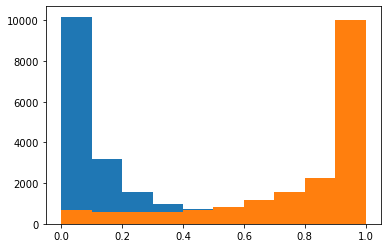

In [29]:
plt.hist(bkg_preds, bins=10);
plt.hist(sig_preds, bins=10);